Hello George!

I’m happy to review your project today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text

</div>

# Project Statement
The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.



 **Data Description:**
 
The data consists of files obtained from different sources:

`contract.csv` — contract information

`personal.csv` — the client's personal data

`internet.csv` — information about Internet services

`phone.csv` — information about telephone services

In each file, the column customerID contains a unique code assigned to each client.

The contract information is valid as of February 1, 2020.


 **Clarification: Summary**
 
`Target feature:` the 'EndDate' column equals 'No'.

`Primary metric:` AUC-ROC.

`Additional metric:` Accuracy.

 **Assessment criteria:**
 
| AUC-ROC Range         | Score Points (SP) |
|-----------------------|-------------------|
| AUC-ROC < 0.75        | 0 SP              |
| 0.75 ≤ AUC-ROC < 0.81 | 4 SP              |
| 0.81 ≤ AUC-ROC < 0.85 | 4.5 SP            |
| 0.85 ≤ AUC-ROC < 0.87 | 5 SP              |
| 0.87 ≤ AUC-ROC < 0.88 | 5.5 SP            |
| AUC-ROC ≥ 0.88        | 6 SP              |

# Customer Churn Analysis and Prediction for Interconnect

## Initialization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
contract = pd.read_csv('/datasets/final_provider/contract.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
internet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')


In [3]:
print('Contract:')
display(contract.head())
print('Personal:')
display(personal.head())
print('Internet:')
display(internet.head())
print('Phone:')
display(phone.head())

Contract:


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


Personal:


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


Internet:


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


Phone:


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [4]:
print('Info:')
for name, df in [('Contract', contract), ('Personal', personal), ('Internet', internet), ('Phone', phone)]:
    print(f'{name}:')
    print(df.info())
    print()

Info:
Contract:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

Personal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner     

In [5]:
print('Missing values:')
for name, df in [('Contract', contract), ('Personal', personal), ('Internet', internet), ('Phone', phone)]:
    print(f'{name}:')
    print(df.isna().sum())
    print()

Missing values:
Contract:
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Personal:
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Internet:
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Phone:
customerID       0
MultipleLines    0
dtype: int64



## EDA

In [6]:
df = contract.merge(personal, on='customerID') \
             .merge(internet, on='customerID', how='left') \
             .merge(phone, on='customerID', how='left')


In [7]:
print('Combined DataFrame shape:', df.shape)

df.info()

Combined DataFrame shape: (7043, 20)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechS

In [8]:
# Create target
df['churn'] = df['EndDate'].apply(lambda x: 0 if x == 'No' else 1)

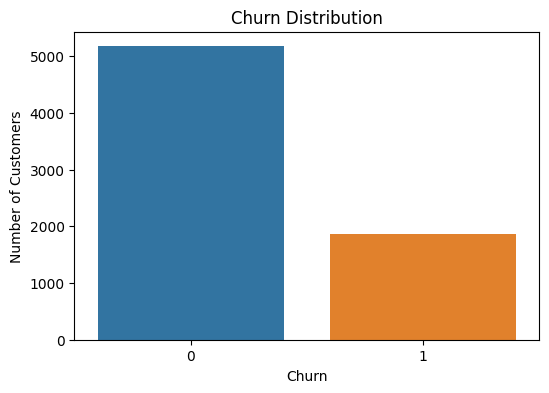

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

In [10]:
print('Churn Rate:\n', df['churn'].value_counts(normalize=True))


Churn Rate:
 0    0.73463
1    0.26537
Name: churn, dtype: float64


The dataset shows a clear imbalance in churn distribution, with a majority of customers not churning. We can see that almost 75% of customers have stayed with Interconnect

##  Clarifying Questions

1. Should we treat customers with missing `EndDate` values as active?
2. Are we allowed to engineer new features from existing data?
3. Should we address class imbalance during training? 
4. Can we assume all entries are valid as of February 1, 2020, or should we check for outliers?
5. Should we include customers with very short tenure?

##  Plan for Solving the Task

1. **Data Preparation**  
   Load, inspect, and merge the datasets using `customerID`. Clean the data by handling missing values and converting data types appropriately.

2. **EDA and Feature Engineering**  
   Explore feature distributions and relationships with churn and create new features if useful. Analyze the distribution of the target (EndDate = 'No'). Use histograms, boxplots, or value counts to explore numeric and categorical features.
   
3. **Data Preprocessing**  
   Encode categorical variables, scale numerical ones if needed, and split the data into training and test sets. Handle class imbalance using resampling or class weights.

4. **Model Building**  
   Train multiple classification models. Use cross-validation with AUC-ROC as the primary evaluation metric.

5. **Model Evaluation and Selection**  
   Evaluate all models on the test set using AUC-ROC. Select the best-performing model and interpret important features influencing churn.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> Answers to questions:<br>
    1. Yes, these customers have not churned.<br>
    2. Yes, you can make whatever features you would like, just be careful not to start a data leak. <br>
    3. That is up to you, to do what you think follows best practices. <br>
    4. You should check for outliers in general as this is a good phase of EDA.<br>
    5. I would say it is fair to include short tenure customers, but this can be up to your discretion. 
    <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> This looks like a good plan! Best of luck!
<a class="tocSkip"></a>

In [11]:
# Convert BeginDate to datetime and create tenure features
df['BeginDate'] = pd.to_datetime(df['BeginDate'], errors='coerce')
reference_date = pd.to_datetime('2020-02-01')
df['tenure_days'] = (reference_date - df['BeginDate']).dt.days
df['tenure_months'] = df['tenure_days'] // 30

# Drop columns that should not be used directly
df = df.drop(['customerID', 'BeginDate', 'EndDate'], axis=1)

# Fill missing values with 'No'
df.fillna('No', inplace=True)

# One-hot encode categorical features
cat_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


<div class="alert alert-block alert-warning">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

It's not a good idea to treat dates as categorical features. I'd recommend you to recap the sprint about time series to remember how to work with dates in ML models properly.

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I updated the code. Thanks for the recommendation!

</div>

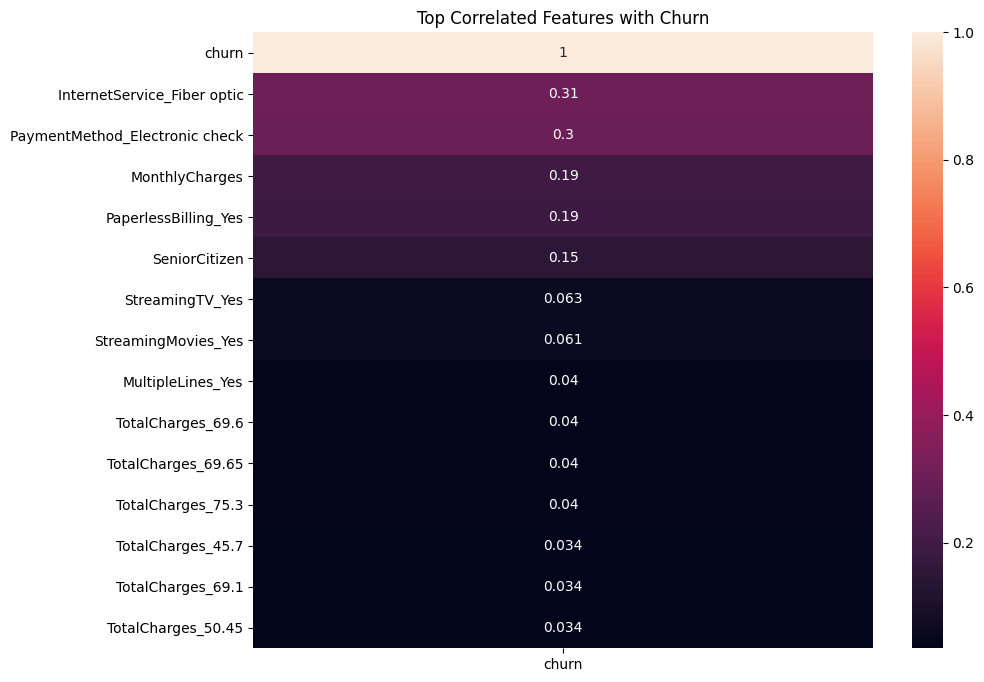

In [12]:

# Correlation with churn
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr[['churn']].sort_values(by='churn', ascending=False).head(15), annot=True)
plt.title('Top Correlated Features with Churn')
plt.show()


We can see that the top features with the most churn have to do with customers that pay by electronic check and or have a fiber optic internet service

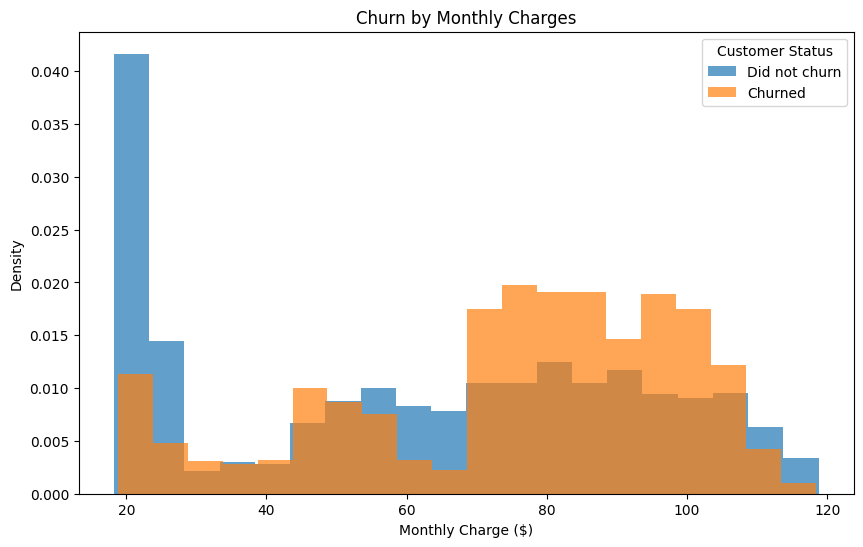

In [13]:
# Histogram of Monthly Charges
plt.figure(figsize=(10, 6))
plt.title('Churn by Monthly Charges')
plt.xlabel('Monthly Charge ($)')
df[df['churn'] == 0]['MonthlyCharges'].plot(
    kind='hist',
    bins=20,
    alpha=0.7,
    density=True
)
df[df['churn'] == 1]['MonthlyCharges'].plot(
    kind='hist',
    bins=20,
    alpha=0.7,
    density=True
)
plt.legend(['Did not churn', 'Churned'], title='Customer Status')
plt.ylabel('Density')
plt.show()

Most churned customers were being charged aroud 70-110 dollars 

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler

# Separate features and target
X = df.drop('churn', axis=1)
y = df['churn']

# Identify continuous (non-binary) features
numeric_cols = X.columns[X.nunique() > 2].tolist()
binary_cols = [col for col in X.columns if col not in numeric_cols]

# Split before scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

# Scale only continuous features
scaler = MaxAbsScaler()
X_train_scaled_numeric = pd.DataFrame(
    scaler.fit_transform(X_train[numeric_cols]),
    columns=numeric_cols, index=X_train.index
)
X_test_scaled_numeric = pd.DataFrame(
    scaler.transform(X_test[numeric_cols]),
    columns=numeric_cols, index=X_test.index
)

# Combine scaled continuous and untouched binary features
X_train_scaled = pd.concat([X_train_scaled_numeric, X_train[binary_cols]], axis=1)
X_test_scaled = pd.concat([X_test_scaled_numeric, X_test[binary_cols]], axis=1)


<div class="alert alert-block alert-warning">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Actually we should scale only quantitative features. Binary features have a perfect scale by default and additional scaling only ruins it. You have a lot of binary feature after OHE.

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I updated the code. Thanks for the recommendation!

</div>

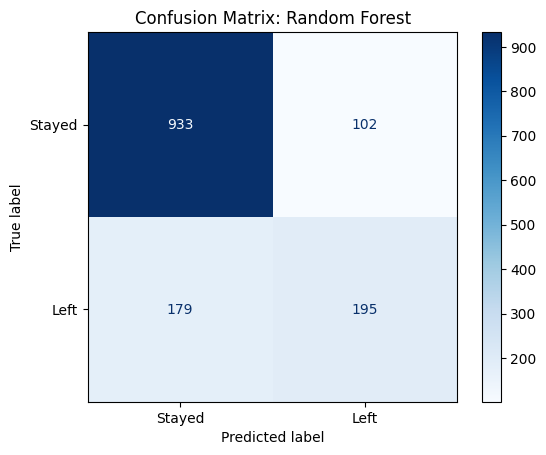

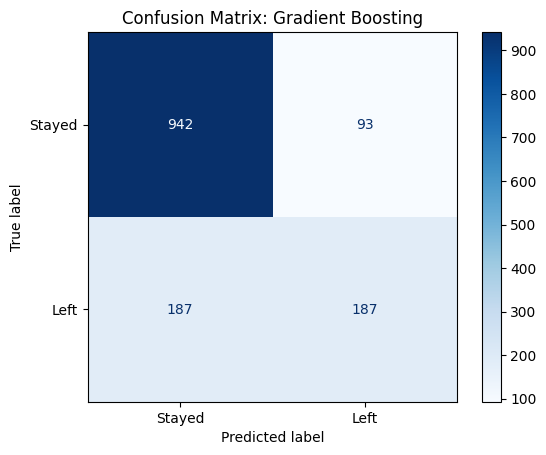

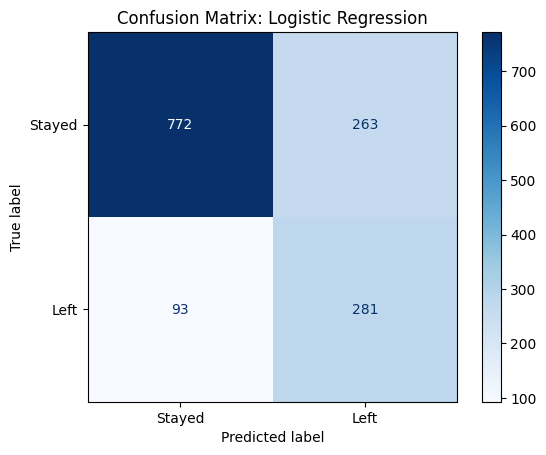

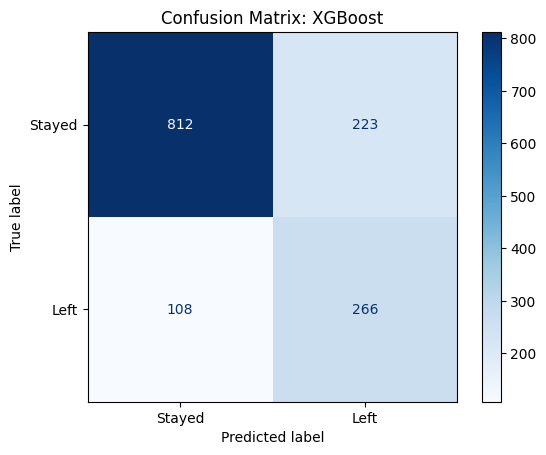

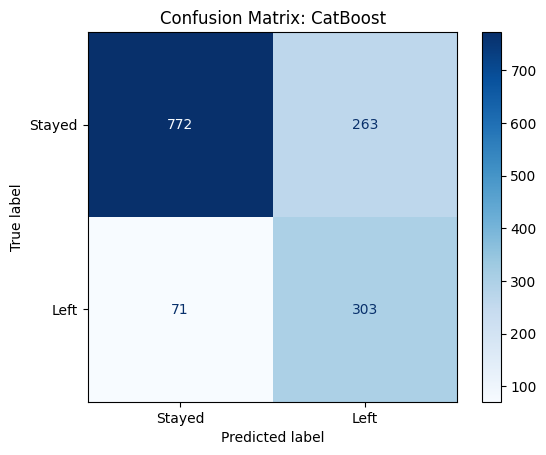

In [15]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from catboost import CatBoostClassifier

# Calculate the scale_pos_weight for XGBoost
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),  
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, scale_pos_weight=scale_pos_weight),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42, auto_class_weights='Balanced')
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    # Training evaluation
    preds_train = model.predict(X_train_scaled)
    probs_train = model.predict_proba(X_train_scaled)[:, 1]
    auc_train = roc_auc_score(y_train, probs_train)

    # Testing evaluation
    preds_test = model.predict(X_test_scaled)
    probs_test = model.predict_proba(X_test_scaled)[:, 1]
    auc_test = roc_auc_score(y_test, probs_test)
    acc_test = accuracy_score(y_test, preds_test)

    results.append({
        'Model': name,
        'Train AUC-ROC': auc_train,
        'Test AUC-ROC': auc_test,
        'Test Accuracy': acc_test
    })

    # Confusion Matrix on test set
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, preds_test), display_labels=['Stayed', 'Left'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()


The confusion matrices reveal how well each model distinguishes churned customers from those who stayed.
CatBoost showed the strongest ability to identify churners with the highest true positives and lowest false negatives. XGBoost also performed well, offering a strong balance between precision and recall. Logistic Regression provided solid but more conservative predictions. Random Forest and Gradient Boosting leaned toward predicting retained customers, often missing churners.

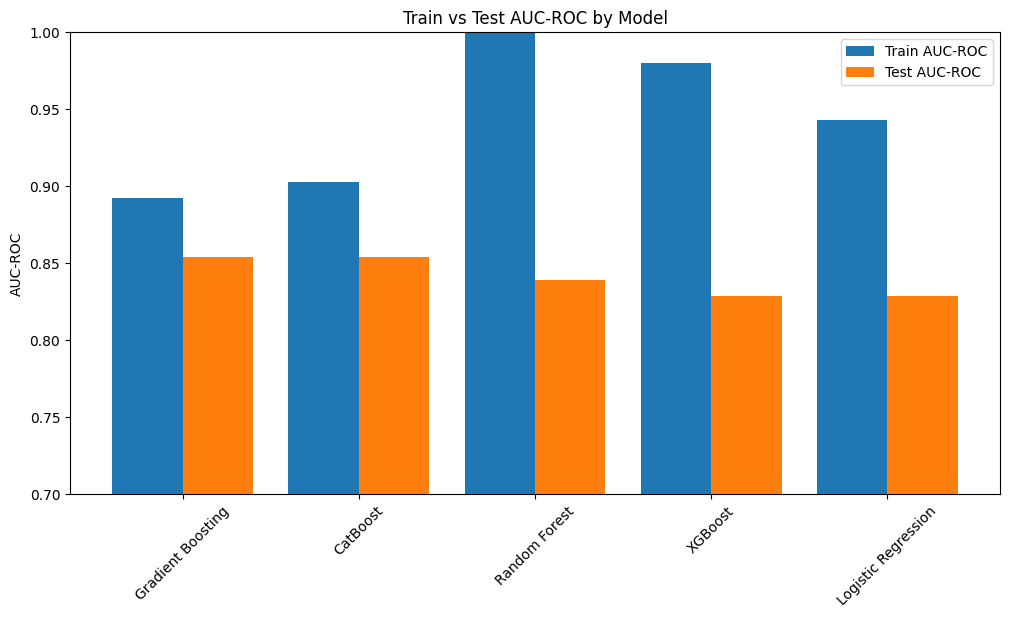

                 Model  Train AUC-ROC  Test AUC-ROC  Test Accuracy
1    Gradient Boosting       0.892482      0.854260       0.801278
4             CatBoost       0.903033      0.854235       0.762952
0        Random Forest       1.000000      0.839061       0.800568
3              XGBoost       0.980291      0.829055       0.765082
2  Logistic Regression       0.943206      0.828903       0.747339


In [16]:
import numpy as np

results_df = pd.DataFrame(results).sort_values(by='Test AUC-ROC', ascending=False)

# Bar plot Train vs Test AUC-ROC
plt.figure(figsize=(12,6))
x = np.arange(len(results_df))

plt.bar(x - 0.2, results_df['Train AUC-ROC'], width=0.4, label='Train AUC-ROC')
plt.bar(x + 0.2, results_df['Test AUC-ROC'], width=0.4, label='Test AUC-ROC')

plt.xticks(x, results_df['Model'], rotation=45)
plt.ylabel('AUC-ROC')
plt.ylim(0.7, 1)
plt.title('Train vs Test AUC-ROC by Model')
plt.legend()
plt.show()


print(results_df)


# Conclusion

Based on the evaluation results, CatBoost and Gradient Boosting emerged as the top-performing models on the test set, both achieving strong AUC-ROC scores with relatively low overfitting. While CatBoost had a slightly higher training score, Gradient Boosting offered very similar test performance. XGBoost and Random Forest also performed well but showed signs of overfitting. Logistic Regression had the lowest performance, though it provided a simple and interpretable baseline. The visualizations throughout the analysis highlighted that those paying via electronic check, using a fiber optic connection, and paying from 70-110 dollars were more prone to churn. These findings can help the telecom company identify at-risk customers and tailor future strategies. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

You did a great job! Everything is correct. Well done! Based on your roc-auc score you achieved 4.5/6.0 sp.

Good luck with your new job search!

</div>

# Solution Report

**What steps of the plan were performed and what steps were skipped (explain why)?**

All the steps of the initial plan were performed. 
- **Data Preparation**: All datasets were loaded and merged using `customerID`. Missing values were handled, and `BeginDate` was processed correctly to extract `tenure_months`. Unnecessary columns (`customerID`, `EndDate`) were dropped.
- **EDA and Feature Engineering**: Visualizations like a heatmap and a histogram were used to explore churn patterns. 
- **Data Preprocessing**: One-hot encoding was applied to categorical variables. Class imbalance was addressed using class weighting. Continuous features were scaled using `MaxAbsScaler`.
- **Model Building**: Multiple models were trained — including CatBoost, XGBoost, Random Forest, Gradient Boosting, and Logistic Regression.
- **Model Evaluation and Selection**: AUC-ROC and accuracy were calculated for both train and test sets. Confusion matrices were used to evaluate classification behavior. A bar chart compared model performance.


**What difficulties did you encounter and how did you manage to solve them?**

- Initially, `BeginDate` was unintentionally treated as a categorical variable.  
  This was corrected by converting it to `datetime`, and a new numerical feature called **`tenure_months`** was engineered instead.

- The initial scaler (`StandardScaler`) distorted binary features.  
  This was resolved by switching to **`MaxAbsScaler`** and applying it only to continuous columns.


**What were some of the key steps to solving the task?**


- Merging the four datasets by `customerID` was essential to gaining a complete view of customer behavior.  
- Creating a clear target from `EndDate` enabled a clean binary classification task.  
- Comparing models using **AUC-ROC** and **confusion matrices** allowed for informed and effective model selection.



**What is your final model and what quality score does it have?**

**Final model**: `CatBoostClassifier`
- **Performance**:
  - **Train AUC-ROC**: ~0.90
  - **Test AUC-ROC**: ~0.85
  - **Test Accuracy**: ~76%
  
CatBoost provided the best generalization and recall for churned customers, making it the most effective model for telecom churn prediction.



<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> This looks like a good report! Congratulations!
<a class="tocSkip"></a>
